In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv('nobel.csv')
df.head()

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France


In [5]:
display(df.shape)
display(df.columns)

(911, 18)

Index(['year', 'category', 'prize', 'motivation', 'prize_share', 'laureate_id',
       'laureate_type', 'full_name', 'birth_date', 'birth_city',
       'birth_country', 'sex', 'organization_name', 'organization_city',
       'organization_country', 'death_date', 'death_city', 'death_country'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 911 entries, 0 to 910
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   year                  911 non-null    int64 
 1   category              911 non-null    object
 2   prize                 911 non-null    object
 3   motivation            823 non-null    object
 4   prize_share           911 non-null    object
 5   laureate_id           911 non-null    int64 
 6   laureate_type         911 non-null    object
 7   full_name             911 non-null    object
 8   birth_date            883 non-null    object
 9   birth_city            883 non-null    object
 10  birth_country         885 non-null    object
 11  sex                   885 non-null    object
 12  organization_name     665 non-null    object
 13  organization_city     667 non-null    object
 14  organization_country  667 non-null    object
 15  death_date            593 non-null    ob

In [7]:
df.isnull().sum()

year                      0
category                  0
prize                     0
motivation               88
prize_share               0
laureate_id               0
laureate_type             0
full_name                 0
birth_date               28
birth_city               28
birth_country            26
sex                      26
organization_name       246
organization_city       244
organization_country    244
death_date              318
death_city              335
death_country           329
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
prizes_per_year = df.groupby('year')['prize'].count()
display(prizes_per_year)

year
1901     6
1902     7
1903     7
1904     6
1905     5
        ..
2012    10
2013    13
2014    13
2015    11
2016    11
Name: prize, Length: 113, dtype: int64

category
Medicine      211
Physics       204
Chemistry     175
Peace         130
Literature    113
Economics      78
Name: count, dtype: int64

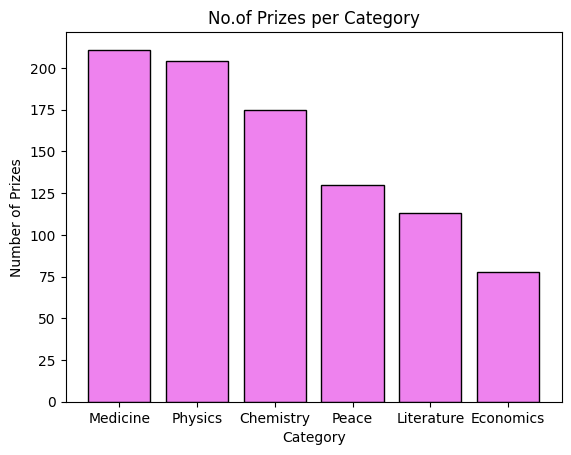

In [10]:
prizes_per_category = df['category'].value_counts()
display(prizes_per_category)
plt.bar(prizes_per_category.index,prizes_per_category.values,color='violet',edgecolor='black')
plt.title("No.of Prizes per Category")
plt.xlabel("Category")
plt.ylabel("Number of Prizes")
plt.show()

In [11]:
type_counts = df['laureate_type'].value_counts()
display(type_counts)

laureate_type
Individual      881
Organization     30
Name: count, dtype: int64

In [12]:
gender = df['sex'].value_counts()
display(gender)

sex
Male      836
Female     49
Name: count, dtype: int64

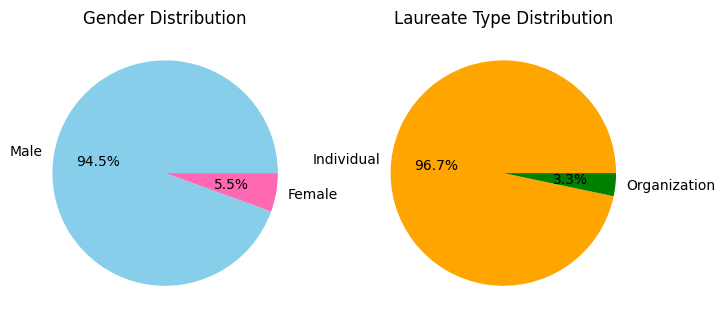

In [13]:
plt.figure(figsize=(8,5))
plt.subplot(1,2,1)
plt.pie(gender,labels=gender.index,autopct='%1.1f%%',colors=['skyblue','hotpink'])
plt.title("Gender Distribution")
plt.subplot(1,2,2)
plt.pie(type_counts,labels=type_counts.index,autopct='%1.1f%%',colors=['orange','green'])
plt.title("Laureate Type Distribution")
plt.show()

In [14]:
print(df['prize_share'].unique())
share=df['prize_share'].value_counts()
display(share)

['1/1' '1/2' '1/4' '1/3']


prize_share
1/1    344
1/2    306
1/3    201
1/4     60
Name: count, dtype: int64

In [15]:
multiple_awards = df['full_name'].value_counts()
multiple_awards = multiple_awards[multiple_awards > 1]
display(multiple_awards)

full_name
Comité international de la Croix Rouge (International Committee of the Red Cross)    3
Frederick Sanger                                                                     2
Marie Curie, née Sklodowska                                                          2
Office of the United Nations High Commissioner for Refugees (UNHCR)                  2
John Bardeen                                                                         2
Linus Carl Pauling                                                                   2
Name: count, dtype: int64

organization_name
University of California                        32
Harvard University                              26
Massachusetts Institute of Technology (MIT)     18
Stanford University                             18
University of Cambridge                         17
University of Chicago                           17
California Institute of Technology (Caltech)    16
Columbia University                             15
Princeton University                            14
Rockefeller University                          11
Name: count, dtype: int64


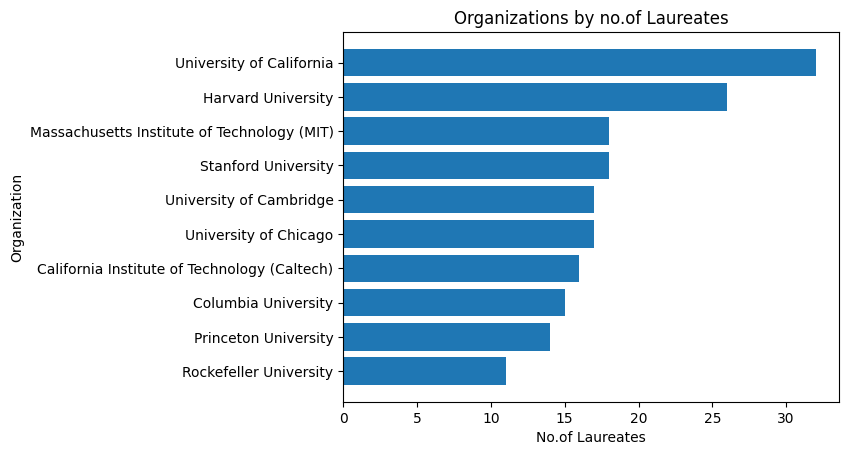

In [16]:
org_counts = df['organization_name'].value_counts().head(10)
print(org_counts)
plt.barh(org_counts.index, org_counts.values)
plt.title("Organizations by no.of Laureates")
plt.xlabel("No.of Laureates")
plt.ylabel("Organization")
plt.gca().invert_yaxis()
plt.show()

In [17]:
alive=df['death_date'].isna().sum()
death=df['death_date'].notna().sum()
print(alive)
print(death)

318
593


award_loc
Abroad          494
Home Country    417
Name: count, dtype: int64

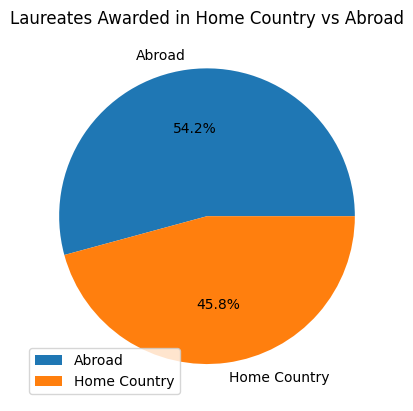

In [18]:
df['award_loc']=df.apply(lambda x: "Home Country" if x['birth_country']==x['organization_country'] else "Abroad",axis=1)
count=df['award_loc'].value_counts()
display(count)
plt.pie(count, labels=count.index, autopct='%1.1f%%')
plt.title("Laureates Awarded in Home Country vs Abroad")
plt.legend()
plt.show()

In [19]:
df['decade'] = (df['year'] // 10) * 10
N_decade = df.groupby('decade')['full_name'].count()
print("No.of laureates per decade:\n", N_decade)
dN_dt = N_decade.diff().fillna(0)
print("\nRate of change per decade:\n", dN_dt)
max_growth_decade = dN_dt.idxmax()
max_growth_value = dN_dt.max()
print(f"\nDecade with fastest growth in laureates: {max_growth_decade}s (+{max_growth_value} laureates)")

No.of laureates per decade:
 decade
1900     57
1910     40
1920     54
1930     56
1940     43
1950     72
1960     79
1970    104
1980     97
1990    104
2000    123
2010     82
Name: full_name, dtype: int64

Rate of change per decade:
 decade
1900     0.0
1910   -17.0
1920    14.0
1930     2.0
1940   -13.0
1950    29.0
1960     7.0
1970    25.0
1980    -7.0
1990     7.0
2000    19.0
2010   -41.0
Name: full_name, dtype: float64

Decade with fastest growth in laureates: 1950s (+29.0 laureates)


In [20]:
df.head()

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,award_loc,decade
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany,Abroad,1900
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France,Abroad,1900
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany,Abroad,1900
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland,Abroad,1900
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France,Abroad,1900


In [21]:
df['birth_date']=pd.to_datetime(df['birth_date'])
df['age']=df['year']-df['birth_date'].dt.year
df.fillna({'age':0},inplace=True)
df['age'].describe()

count    911.000000
mean      57.625686
std       15.950795
min        0.000000
25%       49.000000
50%       59.000000
75%       68.000000
max       90.000000
Name: age, dtype: float64

Correlation: 0.9374690702023408


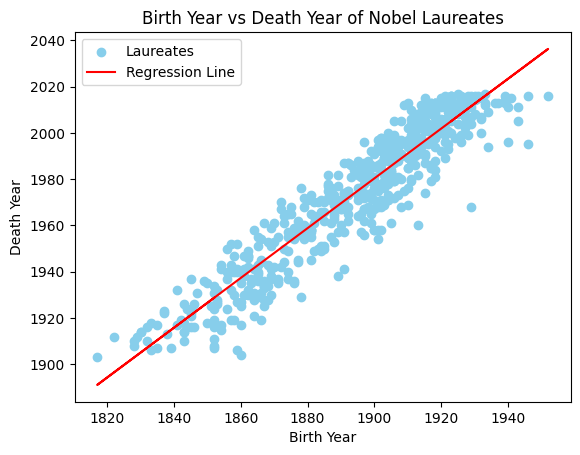

In [22]:
df['birth_date'] = pd.to_datetime(df['birth_date'], errors='coerce')
df['death_date'] = pd.to_datetime(df['death_date'], errors='coerce')
df['birth_year'] = df['birth_date'].dt.year
df['death_year'] = df['death_date'].dt.year
df_years = df[['birth_year', 'death_year']].dropna()
corr = df_years['birth_year'].corr(df_years['death_year'])
print(f"Correlation:",corr)
plt.scatter(df_years['birth_year'], df_years['death_year'],color='skyblue', label='Laureates')
m, c = np.polyfit(df_years['birth_year'], df_years['death_year'], 1)
plt.plot(df_years['birth_year'], m*df_years['birth_year'] + c, color='red', label='Regression Line')
plt.xlabel("Birth Year")
plt.ylabel("Death Year")
plt.title("Birth Year vs Death Year of Nobel Laureates")
plt.legend()
plt.show()

In [23]:
df['age_living']=df['death_year']-df['birth_year']
df.fillna({'age_living':0},inplace=True)
df.head()

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,...,organization_country,death_date,death_city,death_country,award_loc,decade,age,birth_year,death_year,age_living
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,...,Germany,1911-03-01,Berlin,Germany,Abroad,1900,49.0,1852.0,1911.0,59.0
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,...,NaN,1907-09-07,Châtenay,France,Abroad,1900,62.0,1839.0,1907.0,68.0
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),...,Germany,1917-03-31,Marburg,Germany,Abroad,1900,47.0,1854.0,1917.0,63.0
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,...,NaN,1910-10-30,Heiden,Switzerland,Abroad,1900,73.0,1828.0,1910.0,82.0
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,...,NaN,1912-06-12,Paris,France,Abroad,1900,79.0,1822.0,1912.0,90.0


In [24]:
df[df['age_living']>0]['age_living'].describe()

count    593.000000
mean      79.935919
std       10.756485
min       39.000000
25%       73.000000
50%       81.000000
75%       88.000000
max      103.000000
Name: age_living, dtype: float64

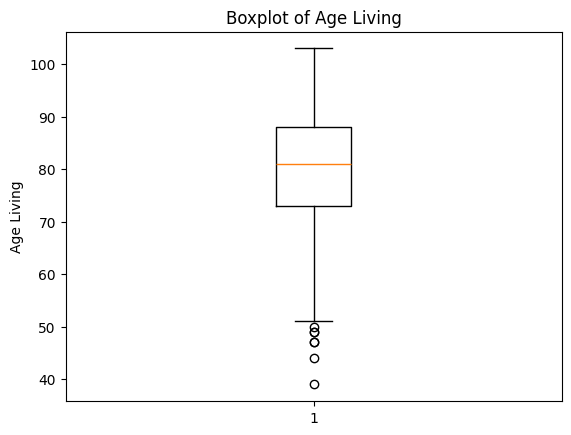

In [25]:
plt.boxplot(df[df['age_living']>0]['age_living'])
plt.title('Boxplot of Age Living')
plt.ylabel('Age Living')
plt.show()

In [26]:
total=df.groupby(['year'])['full_name'].count()
female_per_year=df[df['sex']=='Female'].groupby(['year'])['full_name'].count()
male_per_year=df[df['sex']=='Male'].groupby(['year'])['full_name'].count()
female_proportion=female_per_year/total
male_proportion=male_per_year/total
female_proportion = female_proportion.fillna(0)
male_proportion = male_proportion.fillna(0)
display(female_proportion.head())
display(male_proportion.head())

year
1901    0.000000
1902    0.000000
1903    0.142857
1904    0.000000
1905    0.200000
Name: full_name, dtype: float64

year
1901    1.000000
1902    1.000000
1903    0.857143
1904    0.833333
1905    0.800000
Name: full_name, dtype: float64

In [27]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['sex']=le.fit_transform(df['sex'])
df.head()

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,...,organization_country,death_date,death_city,death_country,award_loc,decade,age,birth_year,death_year,age_living
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,...,Germany,1911-03-01,Berlin,Germany,Abroad,1900,49.0,1852.0,1911.0,59.0
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,...,NaN,1907-09-07,Châtenay,France,Abroad,1900,62.0,1839.0,1907.0,68.0
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),...,Germany,1917-03-31,Marburg,Germany,Abroad,1900,47.0,1854.0,1917.0,63.0
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,...,NaN,1910-10-30,Heiden,Switzerland,Abroad,1900,73.0,1828.0,1910.0,82.0
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,...,NaN,1912-06-12,Paris,France,Abroad,1900,79.0,1822.0,1912.0,90.0


In [29]:
df.iloc[:,:15]

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,1,Berlin University,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,1,NaN,NaN,NaN
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),1,Marburg University,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,1,NaN,NaN,NaN
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
906,2016,Medicine,The Nobel Prize in Physiology or Medicine 2016,"""for his discoveries of mechanisms for autophagy""",1/1,927,Individual,Yoshinori Ohsumi,1945-02-09,Fukuoka,Japan,1,Tokyo Institute of Technology,Tokyo,Japan
907,2016,Peace,The Nobel Peace Prize 2016,"""for his resolute efforts to bring the country...",1/1,934,Individual,Juan Manuel Santos,1951-08-10,Bogotá,Colombia,1,NaN,NaN,NaN
908,2016,Physics,The Nobel Prize in Physics 2016,"""for theoretical discoveries of topological ph...",1/2,928,Individual,David J. Thouless,1934-09-21,Bearsden,United Kingdom,1,University of Washington,"Seattle, WA",United States of America
909,2016,Physics,The Nobel Prize in Physics 2016,"""for theoretical discoveries of topological ph...",1/4,929,Individual,F. Duncan M. Haldane,1951-09-14,London,United Kingdom,1,Princeton University,"Princeton, NJ",United States of America
